Replot
======

This is some basic Jupyter notebook to show you the features of [replot](https://github.com/Phyks/replot). It gives you usage examples, and is used by me as a visual test suite to check I did not break anything between updates.

For detailed documentations, please refer to the module documentation.

## Let's go!

First import the required modules. Note that importing `replot` will not have any side effect and that if you previously imported `matplotlib` it will be left untouched.

In [1]:
import replot

%matplotlib notebook

In [2]:
# Also import numpy as it will be useful…
import numpy as np

# and add some black magic for easy reloading of the module before executing any cell (just here to ease testing)
%load_ext autoreload
%autoreload 2

# ignore matplotlib warnings about too many figures in the notebook
import matplotlib as mpl
mpl.rcParams["figure.max_open_warning"] = 50

## Basic plotting

Let's start by doing some basic plotting.

<IPython.core.display.Javascript object>


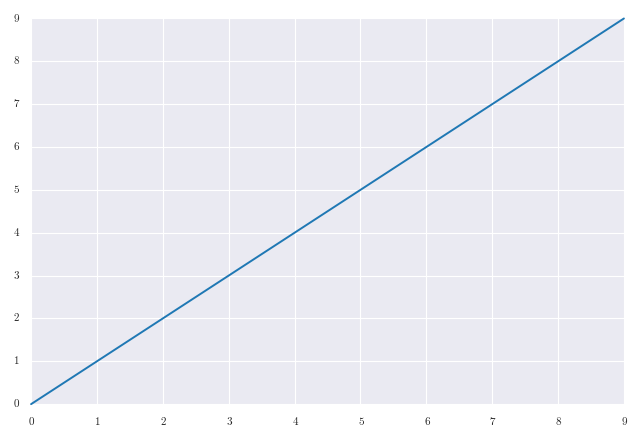

In [3]:
# Let's plot a basic data series, as we would do with matplotlib
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x)

<IPython.core.display.Javascript object>


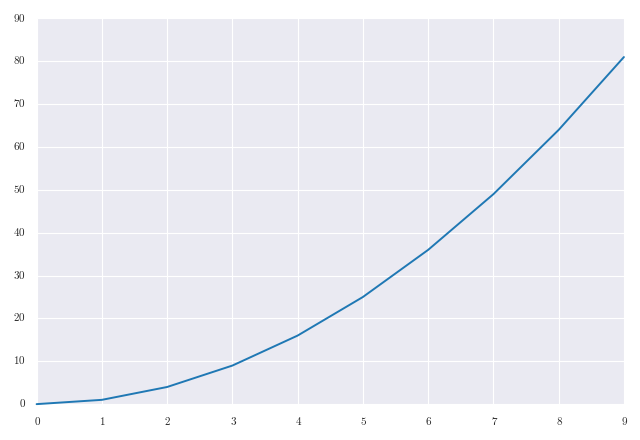

In [4]:
# Or a (X, Y) point series, as we would do with matplotlib
with replot.Figure() as figure:
    x = range(10)
    y = [i**2 for i in x]
    figure.plot(x, y)

<IPython.core.display.Javascript object>


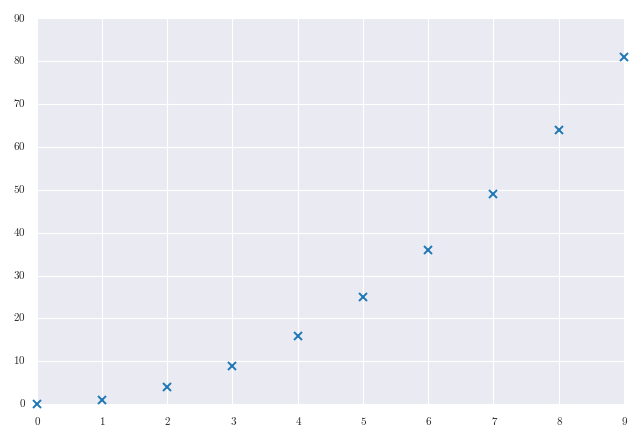

<IPython.core.display.Javascript object>


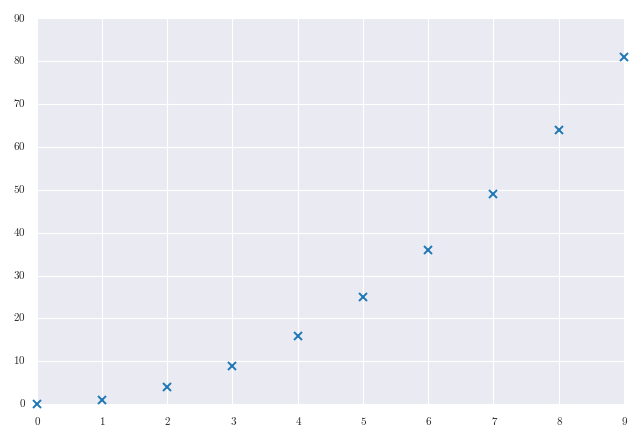

In [5]:
# Plotting a discrete (X, Y) point series
with replot.Figure() as figure:
    x = range(10)
    y = [i**2 for i in x]
    figure.plot(x, y, line=False)
    
# or equivalently plotting a discrete (X, Y) point series, as we would do with matplotlib
with replot.Figure() as figure:
    x = range(10)
    y = [i**2 for i in x]
    figure.plot(x, y, "x")

<IPython.core.display.Javascript object>


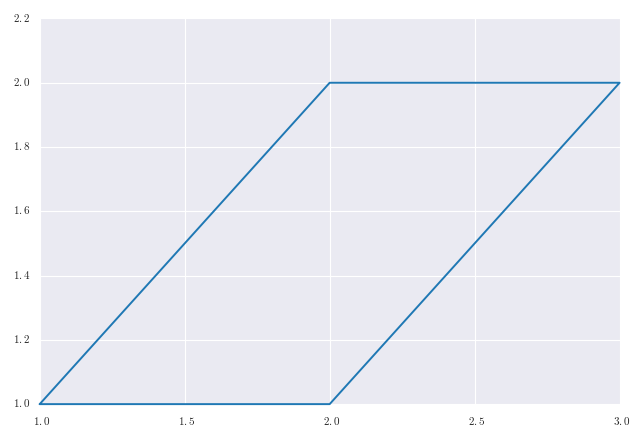

In [6]:
# Plotting broken lines
with replot.Figure() as figure:
    x = [1, 2, 3, 2, 1]
    y = [1, 1, 2, 2, 1]
    figure.plot(x=x, y=y)

<IPython.core.display.Javascript object>


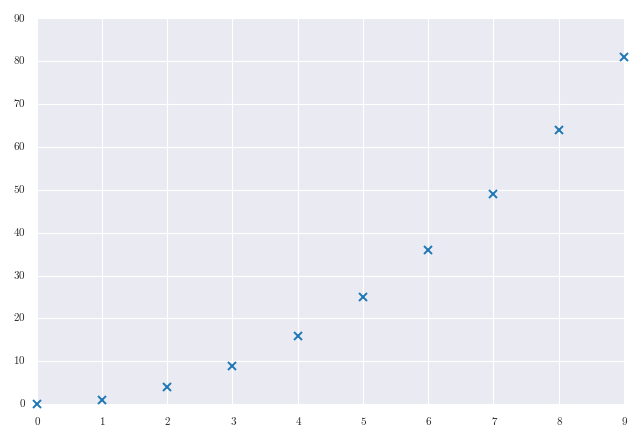

In [7]:
# You can use "x" and "y" keywords if you wish, to specify data
with replot.Figure() as figure:
    x = range(10)
    y = [i**2 for i in x]
    figure.plot(x=x, y=y, line=False)

<IPython.core.display.Javascript object>


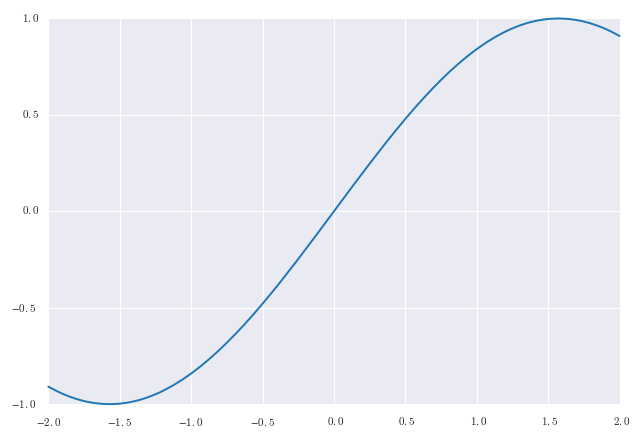

In [8]:
# But we can also plot a function, by automatically
# evaluating it on the given interval
with replot.Figure() as figure:
    figure.plot(np.sin, (-2, 2))  # Plot sinus on [-2, 2]

<IPython.core.display.Javascript object>


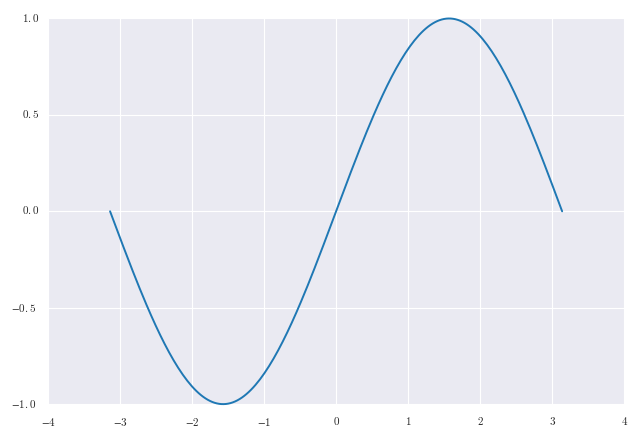

In [9]:
# We can also do the same forcing replot to use some evaluation points
with replot.Figure() as figure:
    x = np.linspace(-np.pi, np.pi, 200)
    figure.plot(np.sin, x)

<IPython.core.display.Javascript object>


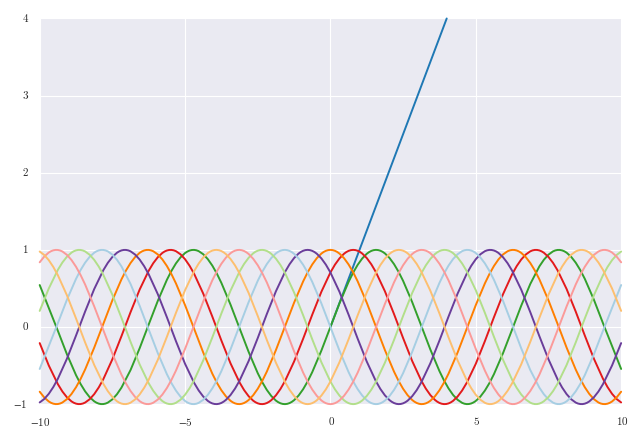

In [10]:
# And we can plot multiples graphs on the same figure
with replot.Figure() as figure:
    figure.plot(range(5))
    for i in range(8):
        figure.plot(lambda x: np.sin(x + np.pi * i / 4), (-10, 10))

## Advanced plotting

We can do more elaborated stuff easily with `replot`.

<IPython.core.display.Javascript object>


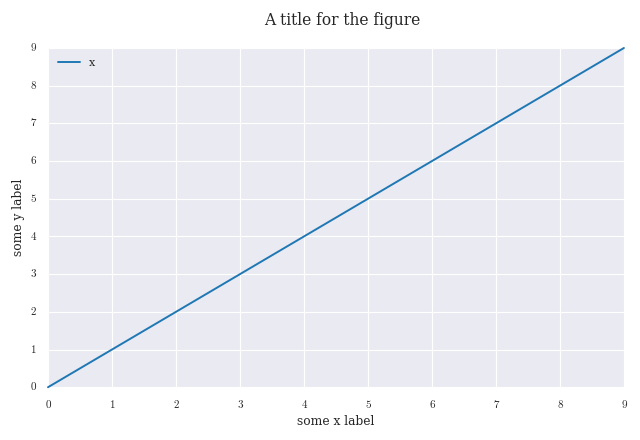

In [21]:
# Plot with a label on the axis, and a title for the figure
# Note how the legend will be automatically added when a "label" is found!
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x, label="x")
    figure.xlabel = "some x label"
    figure.ylabel = "some y label"
    figure.title = "A title for the figure"

<IPython.core.display.Javascript object>


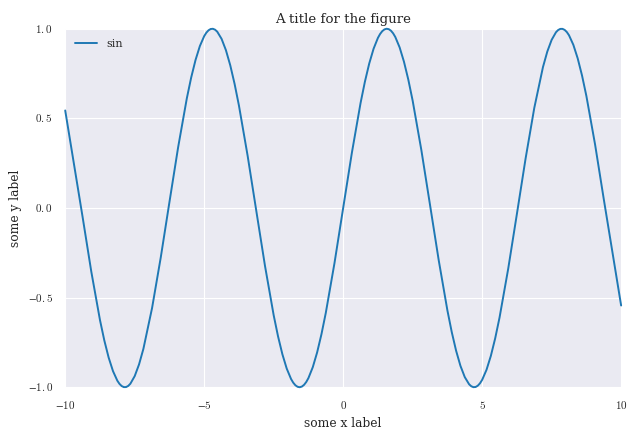

<IPython.core.display.Javascript object>


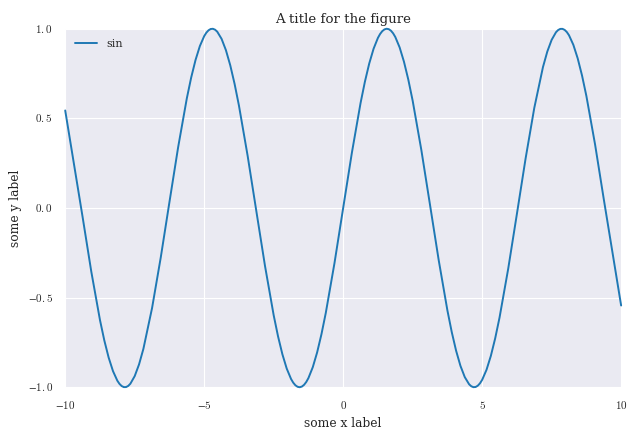

<IPython.core.display.Javascript object>


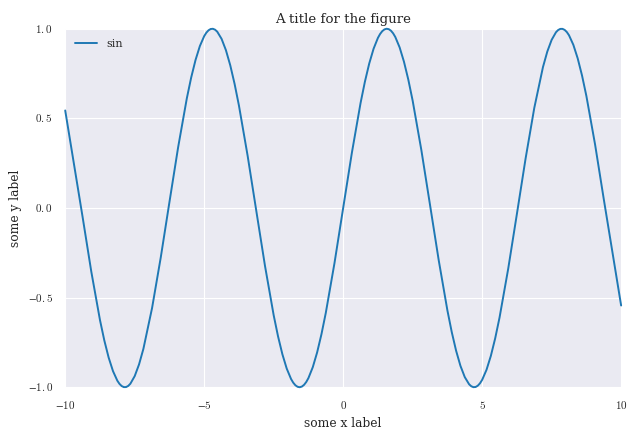

<IPython.core.display.Javascript object>


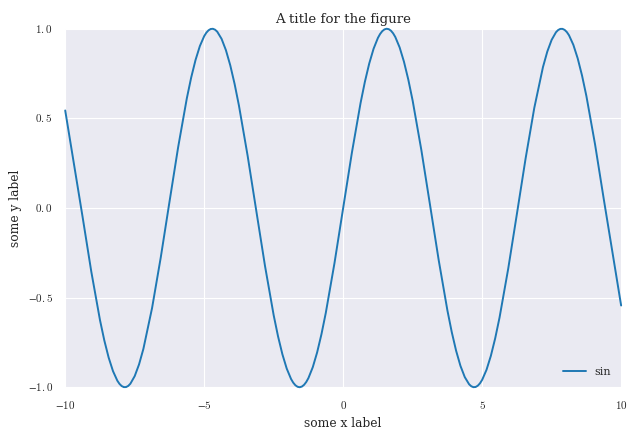

<IPython.core.display.Javascript object>


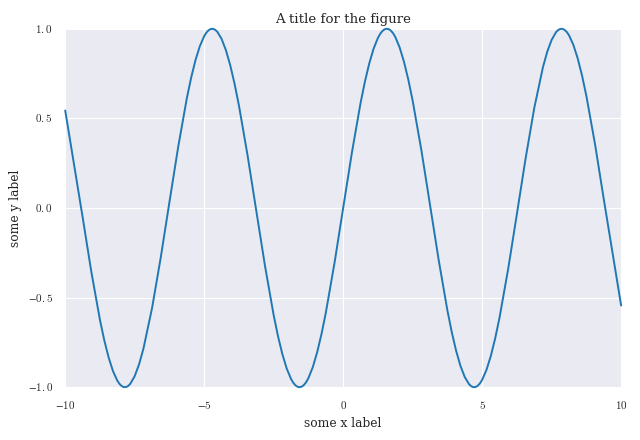

In [12]:
# We can also pass these options directly to the constructor
# Here, we force the legend to be at the best location
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend="best") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")
    
# But we could also not constraint it (best location will be choosen)
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")
    
# Or just say we want a legend (same as not constraining it)
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=True) as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

# Or force it to be in the lower right corner
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend="lower right") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")
    
# Or explicitly disable the legend, even if labels are found
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=False) as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

<IPython.core.display.Javascript object>


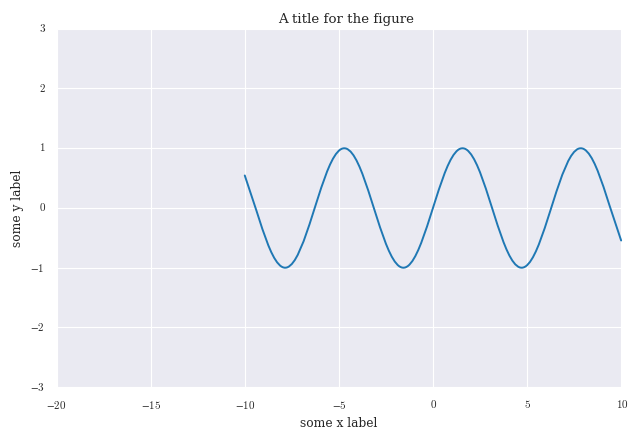

<IPython.core.display.Javascript object>


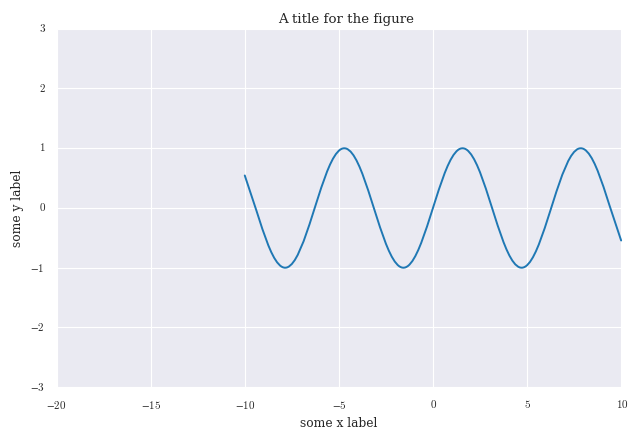

In [13]:
# We can also force the range of the axis
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=False,
                   xrange=(-20, 10),
                   yrange=(-3.0, 3.0)) as figure:
    figure.plot(np.sin, (-10, 10), label="sin")
    
# Or equivalently
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=False) as figure:
    figure.xrange = (-20, 10)
    figure.yrange = (-3.0, 3.0)
    figure.plot(np.sin, (-10, 10), label="sin")

<IPython.core.display.Javascript object>


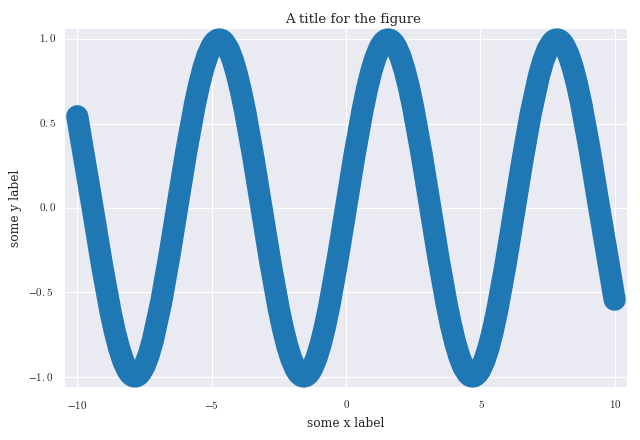

In [14]:
# Passing extra arguments to matplotlib plot command is as easy as
# passing them to replot plot command.
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=True) as figure:
    figure.plot(np.sin, (-10, 10), linewidth=20)

<IPython.core.display.Javascript object>


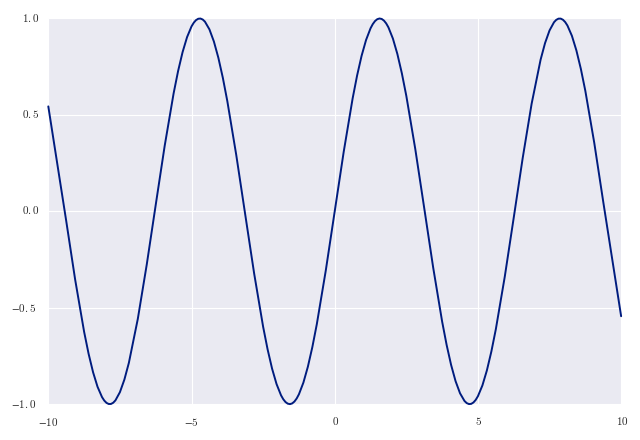

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681)]


<IPython.core.display.Javascript object>


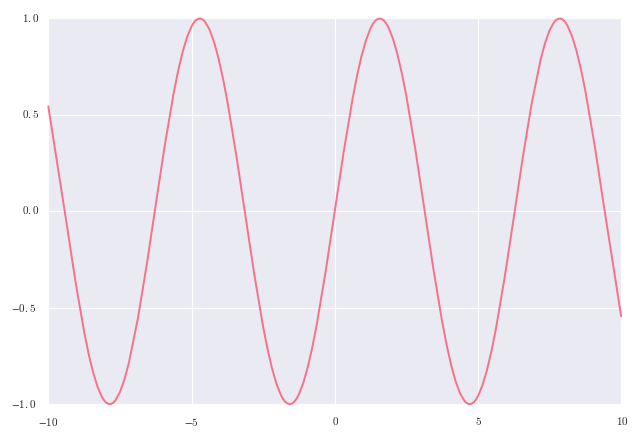

<IPython.core.display.Javascript object>


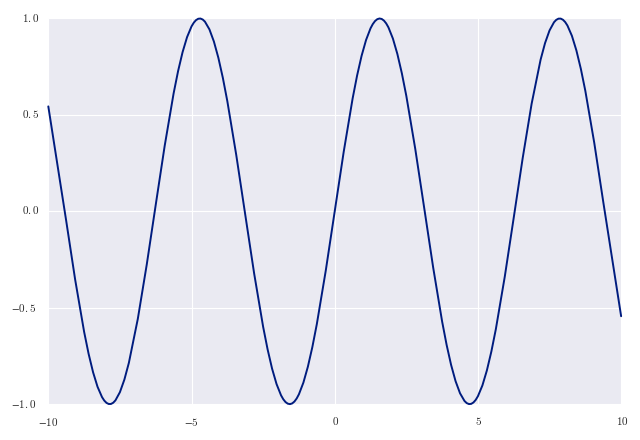

<IPython.core.display.Javascript object>


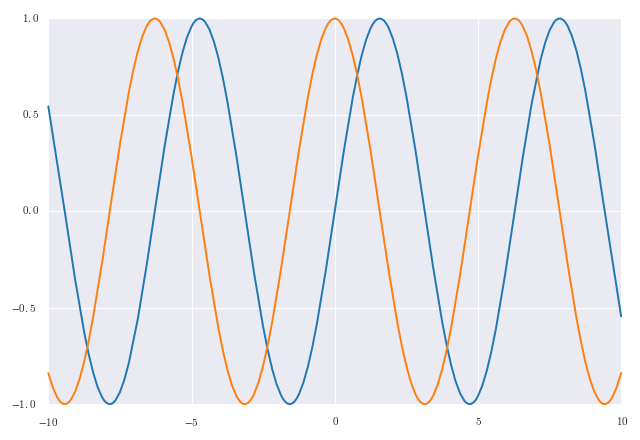

In [19]:
import seaborn.apionly as sns
# You can also tweak the palette used, either with a seaborn palette
with replot.Figure(palette=sns.color_palette("dark", 10)) as figure:
    figure.plot(np.sin, (-10, 10))

# or by passing it a list of colors as RGB tuples
palette = list(sns.color_palette("husl", 2))
import pprint
pprint.pprint(palette)
with replot.Figure(palette=palette) as figure:
    figure.plot(np.sin, (-10, 10))
    
# or by passing it a callable taking number of subplots as argument
with replot.Figure(palette=lambda n: sns.color_palette("dark", n)) as figure:
    figure.plot(np.sin, (-10, 10))
    
# or using one of the predefined palettes: colorbrewerq10 (default one), colorbrewerq9 and tableau10
with replot.Figure(palette="tableau10") as figure:
    figure.plot(np.sin, (-10, 10))
    figure.plot(np.cos, (-10, 10))

<IPython.core.display.Javascript object>


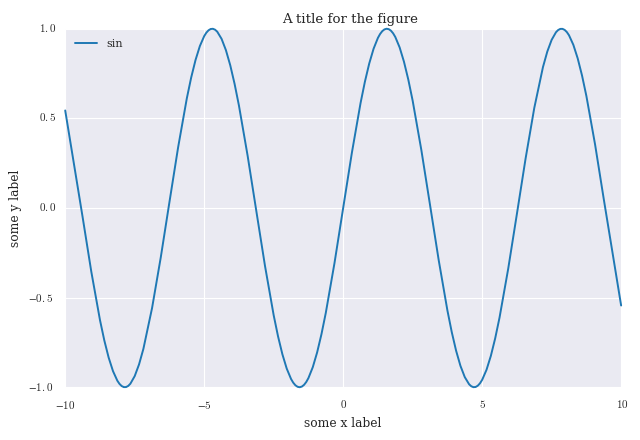

In [20]:
# It is not mandatory at all to use a with statement
fig = replot.Figure(xlabel="some x label",
                    ylabel="some y label",
                    title="A title for the figure",
                    legend="best")
fig.plot(np.sin, (-10, 10), label="sin")
fig.show()  # But in this case, we must show the figure

<IPython.core.display.Javascript object>


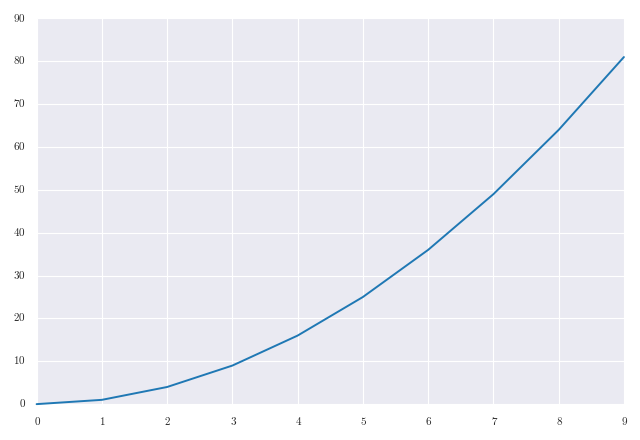

In [21]:
# NOTE: Passing tuples to the plot function uses
# the tuples as (x, y) point series, which is not the standard matplotlib
# behavior.
with replot.Figure() as figure:
    x = range(10)
    y = [i**2 for i in x]
    figure.plot(zip(x, y))

<IPython.core.display.Javascript object>


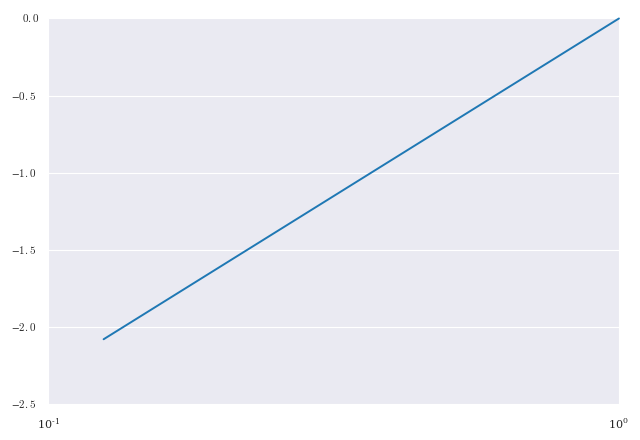

In [22]:
# To plot in log scale, you can use the Figure.logplot() method
with replot.Figure() as figure:
    figure.logplot(np.log, (-1, 1))

<IPython.core.display.Javascript object>


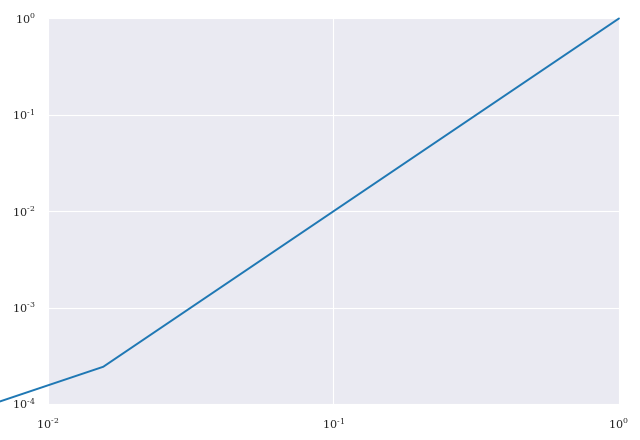

In [23]:
# Same for log-log scale, you can use the Figure.loglogplot() method
with replot.Figure() as figure:
    figure.loglogplot(lambda x: x**2, (0, 1))

<IPython.core.display.Javascript object>


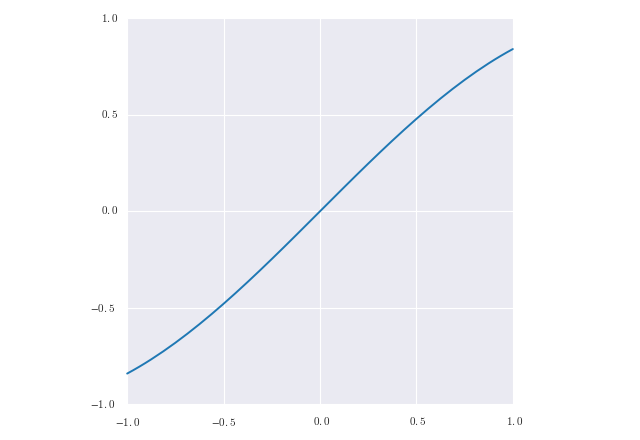

In [24]:
# To force an orthonormal frame, use orthonormal=True on the plot
with replot.Figure() as figure:
    figure.plot(np.sin, (-1, 1), orthonormal=True)

<IPython.core.display.Javascript object>


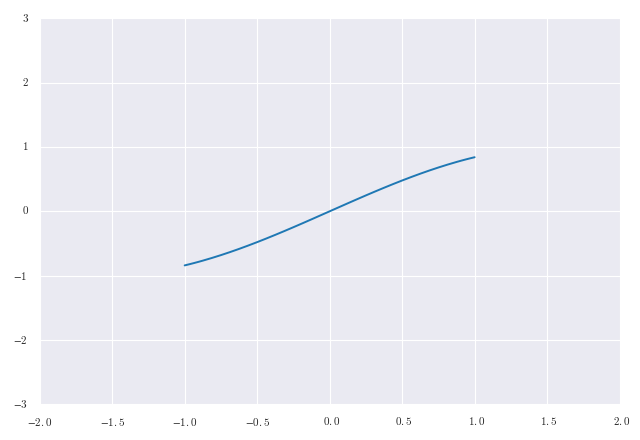

In [25]:
# To force the limits of the axis, use xlim and ylim
with replot.Figure() as figure:
    figure.plot(np.sin, (-1, 1), xlim=(-2, 2), ylim=(-3, 3))

<IPython.core.display.Javascript object>


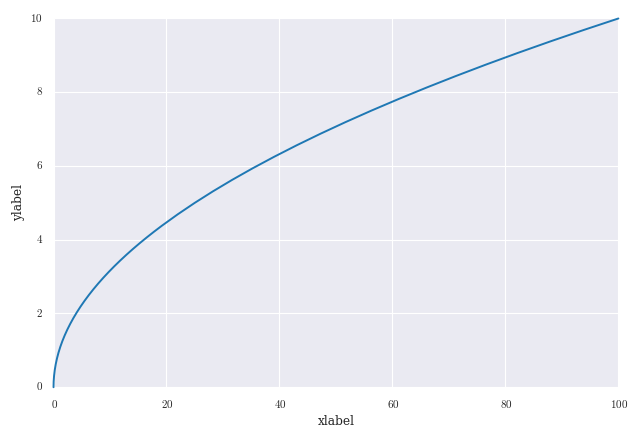

In [26]:
# You can invert X and Y components easily
# Note that this will invert axes labels as well
with replot.Figure() as figure:
    figure.xlabel = "ylabel"
    figure.ylabel = "xlabel"
    figure.plot(lambda x: x**2, (0, 10), invert=True)  # Note that we plot x^2, not sqrt(x), but invert axis

<IPython.core.display.Javascript object>


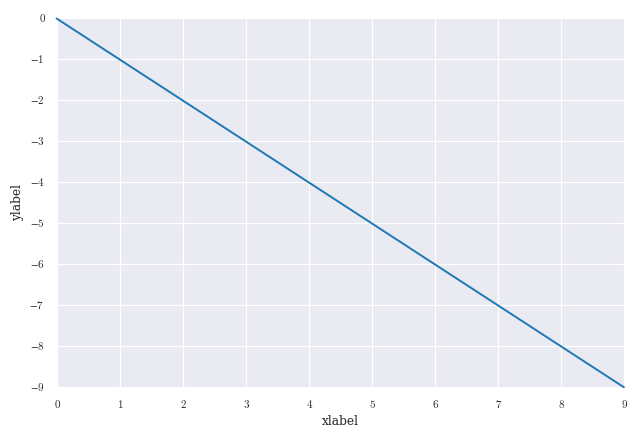

In [27]:
# You can also rotate X and Y components easily
# Note that this will not affect the axes labels  
with replot.Figure() as figure:
    x = range(10)
    figure.xlabel = "xlabel"
    figure.ylabel = "ylabel"
    figure.plot(x, x, rotate=90)

<IPython.core.display.Javascript object>


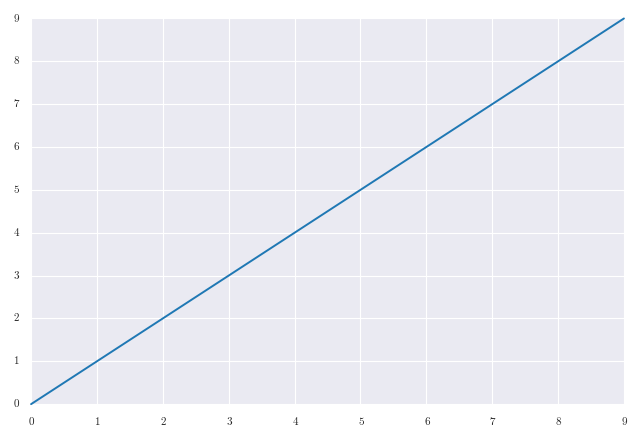

<IPython.core.display.Javascript object>


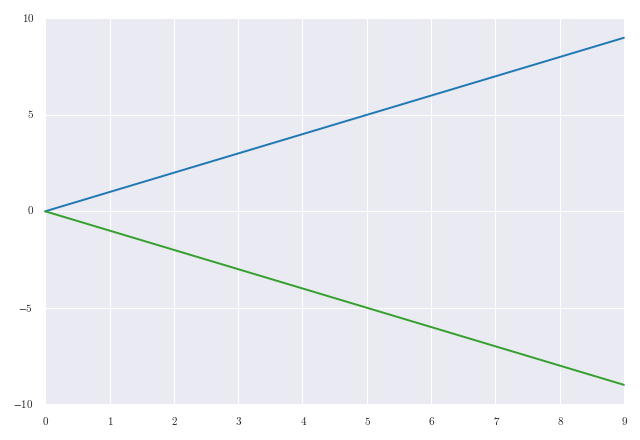

In [29]:
# You can plot multiple times the same figure
with replot.Figure() as fig:
    fig.plot(range(10))
    fig.show()  # Show the figure with only the plot above
    fig.plot(range(10), [-i for i in range(10)])  # Add an extra plot to the figure
    # Figure is shown again when going out of scope, with two subplots this time

## One-liner plotting

You can also make plot with a one-liner.

<IPython.core.display.Javascript object>


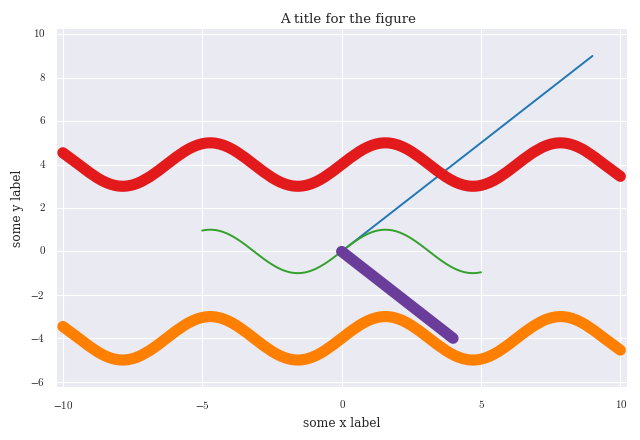

In [30]:
# Many plots done with a single one-liner
replot.plot([range(10), (np.sin, (-5, 5)), (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, (-10, 10), {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best")

<IPython.core.display.Javascript object>


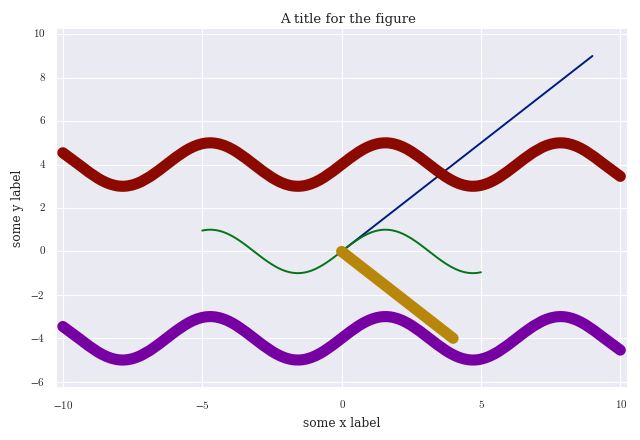

In [31]:
# Another one-liner plot example
replot.plot([range(10), (np.sin, (-5, 5)), (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, (-10, 10), {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best",
            palette=sns.color_palette("dark"))

## Using subplots

Subplots are defined by `group`. You can declare a group and add figure to it using the `group` keyword in `plot` commands, as demonstrated below.

_Note_: Groups are represented by one unicode character. "\_" is the default group in which go all the plots which are not mapped onto a group. Hence, it is a reserved group symbol which cannot be used.

<IPython.core.display.Javascript object>


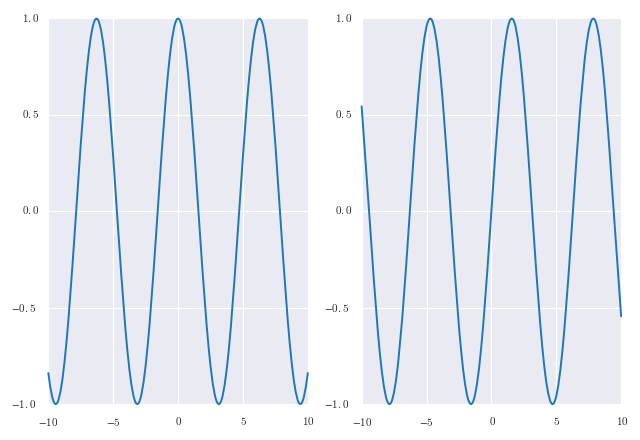

In [32]:
# Using groups to define subplots
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.sin, (-10, 10), group="ç")

<IPython.core.display.Javascript object>


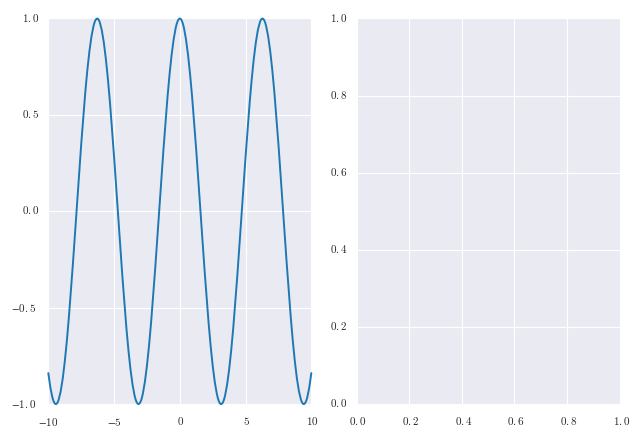

In [33]:
# Applying a grid on a figure, one empty subplot
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.set_grid(["ab"])

<IPython.core.display.Javascript object>


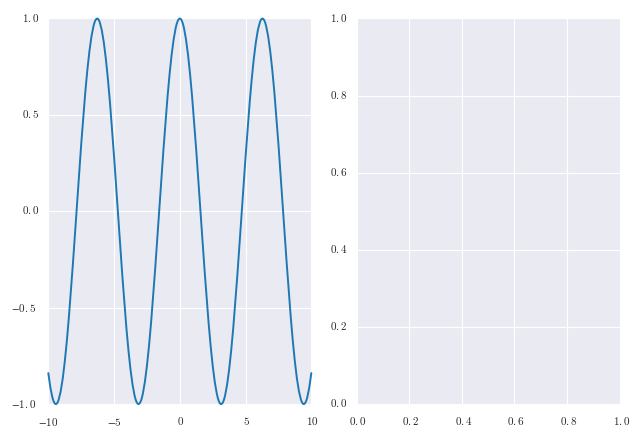

In [34]:
# Applying a grid on a figure, one empty subplot
# Note that if there is a single row, enclosing in a list is not mandatory
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.set_grid("ab")

<IPython.core.display.Javascript object>


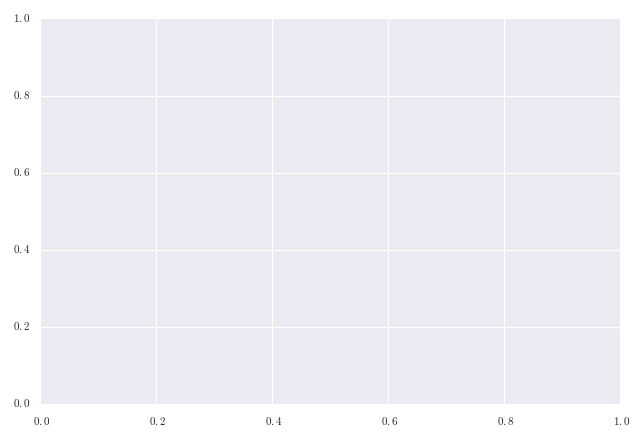

In [35]:
# Applying a grid on a figure, default group is masked
# Note that if we do not put the default group ("_") in the grid,
# it will not be shown
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10))
    figure.set_grid(["a"])

<IPython.core.display.Javascript object>


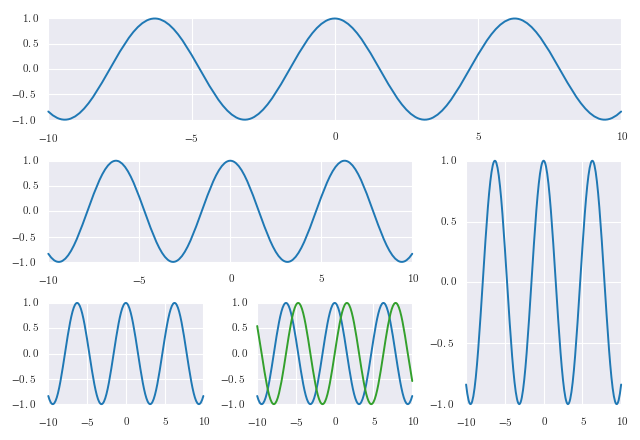

In [36]:
# Using set_grid, you can define very easily (and visually) a quite complex grid layout
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.plot(np.cos, (-10, 10), group="c")
    figure.plot(np.cos, (-10, 10), group="d")
    figure.plot(np.cos, (-10, 10), group="e")
    figure.plot(np.sin, (-10, 10), group="e")
    figure.set_grid(["aaa",
                     "bbc",
                     "dec"])

<IPython.core.display.Javascript object>


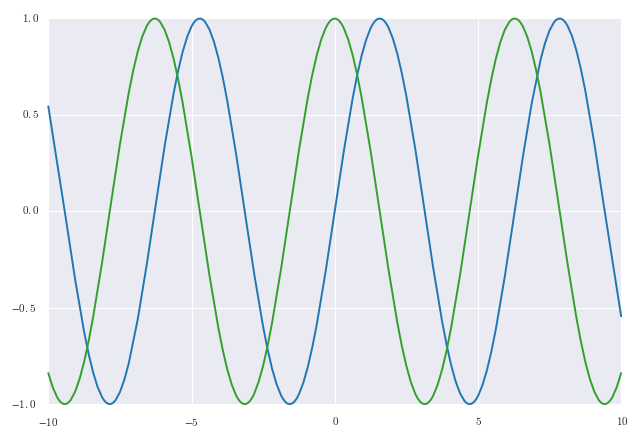

In [37]:
# By setting the grid to False, you can ignore the groups you defined
# and plot everything in the same subplot.
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.sin, (-10, 10), group="ç")
    figure.set_grid(False)

<IPython.core.display.Javascript object>


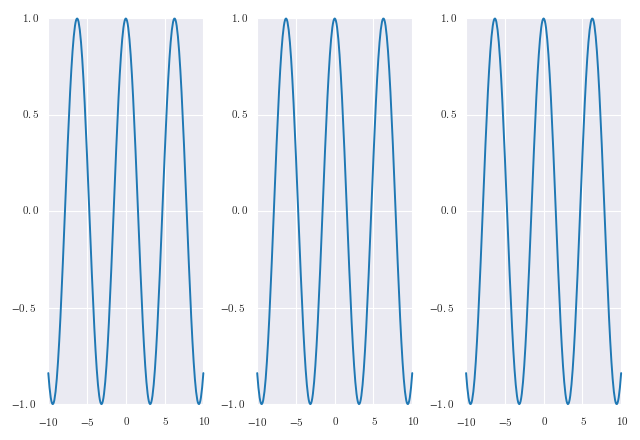

In [38]:
# Forcing a grid layout
# Use auto={"ignore_groups": True} to put every plot in
# a different subplot, regardless of their group.
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10))
    figure.plot(np.cos, (-10, 10))
    figure.plot(np.cos, (-10, 10))
    figure.set_grid(ignore_groups=True)

<IPython.core.display.Javascript object>


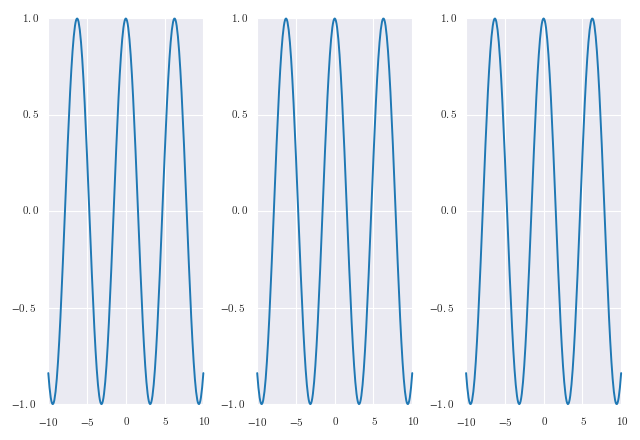

In [39]:
# Auto gridifying example
# Use ignore_groups=True to put every plot in a different subplot,
# without having to deal with groups.
# Note that ignore_groups=True will discard the groups you may have defined.
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.plot(np.cos, (-10, 10), group="c")
    figure.set_grid(ignore_groups=True)

<IPython.core.display.Javascript object>


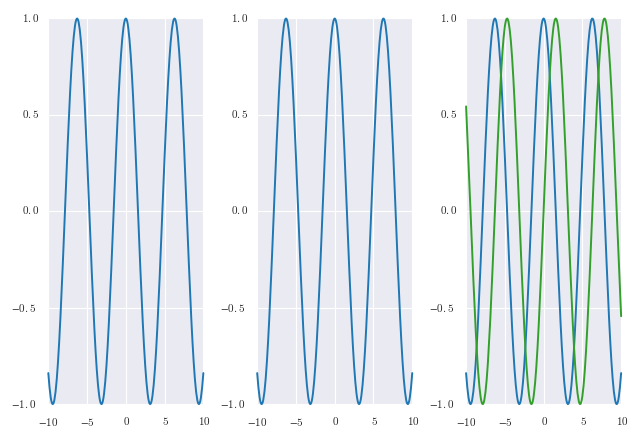

In [40]:
# Gridify example
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.plot(np.cos, (-10, 10))
    figure.plot(np.sin, (-10, 10))

<IPython.core.display.Javascript object>


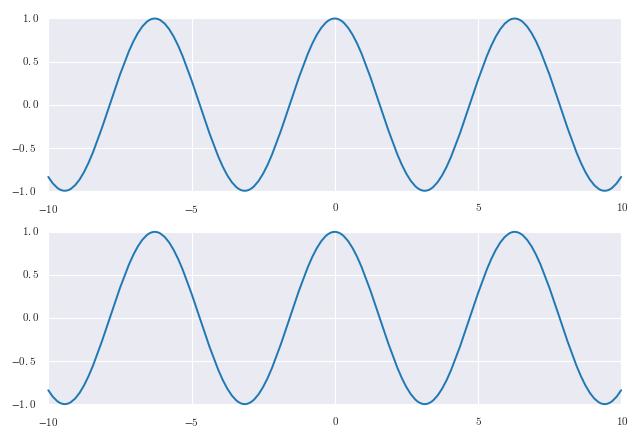

<IPython.core.display.Javascript object>


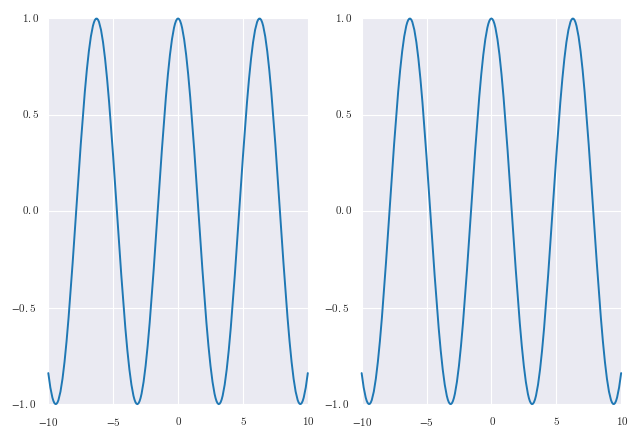

In [41]:
# Gridify example, forced height
# If the default gridify layout is not fitting well, you can force the height
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.set_grid(height=2)
    
# Gridify example, forced width
# … or the width
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.set_grid(width=2)

<IPython.core.display.Javascript object>


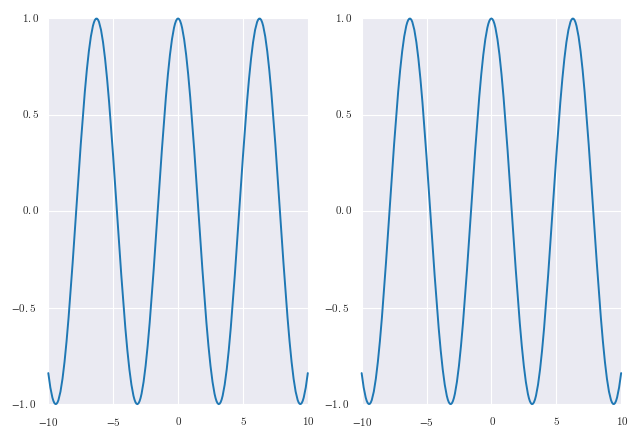

In [42]:
# You can also specify a grid directly in the constructor
with replot.Figure(
    grid={
        "width": 2, 
        "height": 1, 
        "grid": [
            ((0, 0), "a", (1, 1)),
            ((0, 1), "b", (1, 1))
        ]}) as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")

<IPython.core.display.Javascript object>


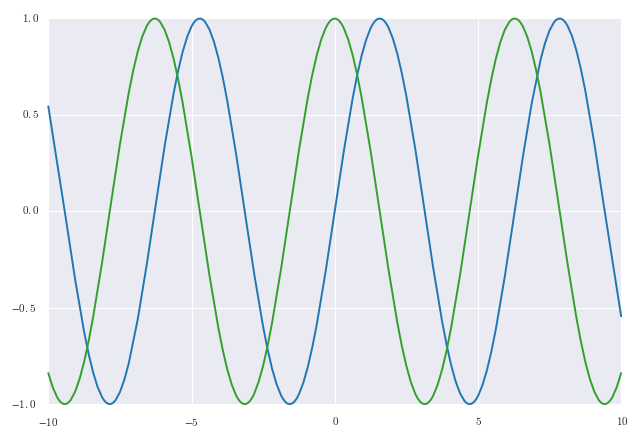

In [43]:
# You can also specify a grid directly in the constructor
# Setting the grid to False ignores the groups you may have defined.
with replot.Figure(
    grid=False) as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.sin, (-10, 10), group="b")

<IPython.core.display.Javascript object>


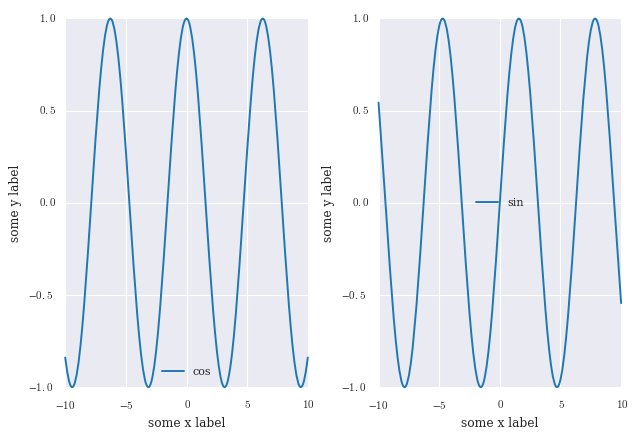

In [44]:
# Note that if we use legend, xlabel or ylabel with subplots,
# they will be set identically on every subplot
with replot.Figure(xlabel="some x label", ylabel="some y label") as figure:
    figure.plot(np.cos, (-10, 10), group="a", label="cos")
    figure.plot(np.sin, (-10, 10), group="ç", label="sin")
    figure.set_grid(["aç"])

<IPython.core.display.Javascript object>


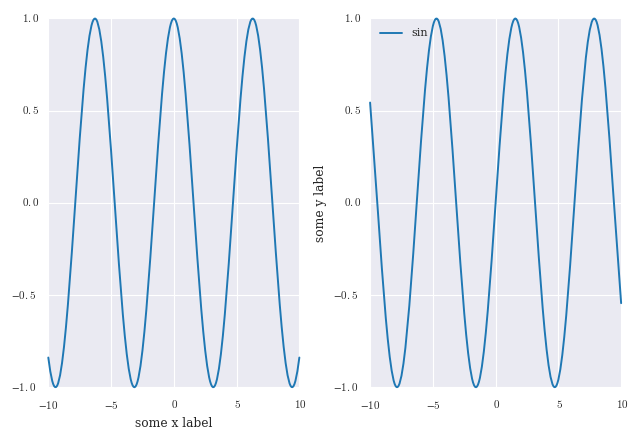

In [45]:
# You can avoid it by passing dict for these arguments
# they will be set identically on every subplot
with replot.Figure(xlabel={"a": "some x label", "ç": ""},
                   ylabel={"a": "", "ç": "some y label"},
                   legend={"a": False}) as figure:
    figure.plot(np.cos, (-10, 10), group="a", label="cos")
    figure.plot(np.sin, (-10, 10), group="ç", label="sin")
    figure.set_grid(["aç"])

## Saving figures

In [46]:
# Save a figure to a file
with replot.Figure(savepath="/tmp/out.png") as figure:
    figure.plot(np.cos, (-10, 10))

In [47]:
# or equivalently
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10))
    figure.savepath = "/tmp/out.png"

## Animations

<IPython.core.display.Javascript object>


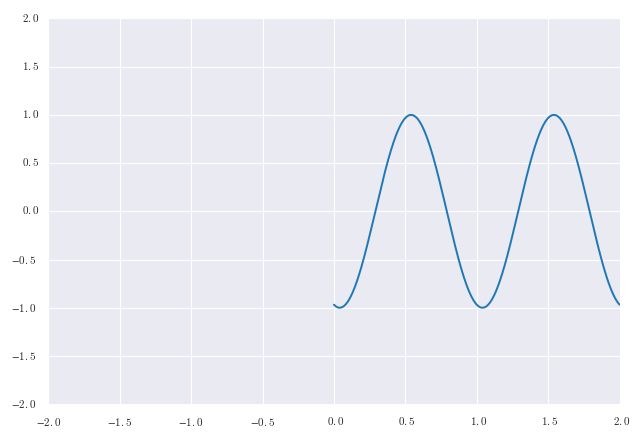

In [49]:
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10))
    figure.animate()

## Hacking with matplotlib

<IPython.core.display.Javascript object>


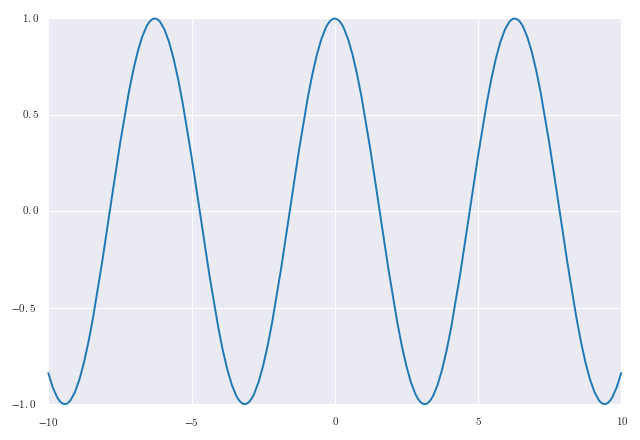

In [50]:
# You can set the figure and axis attributes used by replot, to call extra methods and pass
# specific parameters to them, that replot would not expose.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlim((-20, 20))

with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10))
    figure.figure = fig
    figure.axes = {"_": ax}

## Some errors you might encounter

In [51]:
# Invalid interval for plotting a function
with replot.Figure() as figure:
    figure.plot(np.sin, None)

InvalidParameterError: Second parameter in plot command should be a tuple specifying plotting interval.

In [52]:
# Invalid plot call, no arguments given
with replot.Figure() as figure:
    figure.plot()

InvalidParameterError: You should pass at least one argument to this function.

In [53]:
# Invalid group argument, groups are one unicode character long
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="abc")

InvalidParameterError: Group name cannot be longer than one unicode character.

In [54]:
# Invalid grid, no grid provided
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid([])

AttributeError: 'Figure' object has no attribute 'apply_grid'

In [55]:
# Invalid grid, not a rectangular one
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid(["a",
                       "ba"])

AttributeError: 'Figure' object has no attribute 'apply_grid'